In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import librosa
import librosa.display
import numpy as np
import pandas as pd

In [3]:
def extract_features(audio_file):
    y, sr = librosa.load(audio_file)

    # Mel-Spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

    # MFCC
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    # MFCC Delta
    mfcc_delta = librosa.feature.delta(mfcc)

    # Chromagram
    chromagram = librosa.feature.chroma_stft(y=y, sr=sr)

    # Spectral Contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

    # You can add more features here if needed

    # Stack all features together
    features = np.vstack([mel_spectrogram_db, mfcc, mfcc_delta, chromagram, spectral_contrast])

    return features

In [4]:
# Replace 'your_audio_file.wav' with the path to your audio file
audio_file = '/content/drive/MyDrive/DL project/Merged and preprocessed audio/Final_audio/101_1b1_Pr_sc_Meditron_1_standardized_dup108.wav'
features = extract_features(audio_file)

# Print the shape of the extracted features
print(features.shape)

(173, 259)


/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [5]:
import librosa
import librosa.display
import numpy as np

def extract_features(audio_file):
    y, sr = librosa.load(audio_file)
    # Setting n_fft and hop_length
    n_fft = 2048
    hop_length = 512

    # Mel-Spectrogram (128 x 264)
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=128)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)[:, :264]

    # MFCC (13 x 264)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)[:, :264]

    # MFCC Delta (13 x 264)
    mfcc_delta = librosa.feature.delta(mfcc)[:,:264]

    # Chromagram (12 x 264)
    chromagram = librosa.feature.chroma_stft(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)[:, :264]

    # Spectral Contrast (7 x 264)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)[:, :264]

    # Stack all features together (173 x 264)
    features = np.vstack([mel_spectrogram_db, mfcc, mfcc_delta, chromagram, spectral_contrast])

    return features

In [6]:
audio_file = '/content/drive/MyDrive/DL project/Merged and preprocessed audio/Final_audio/101_1b1_Pr_sc_Meditron_1_standardized_dup108.wav' # Replace with your audio file path
features = extract_features(audio_file)
print(features.shape)

(173, 259)


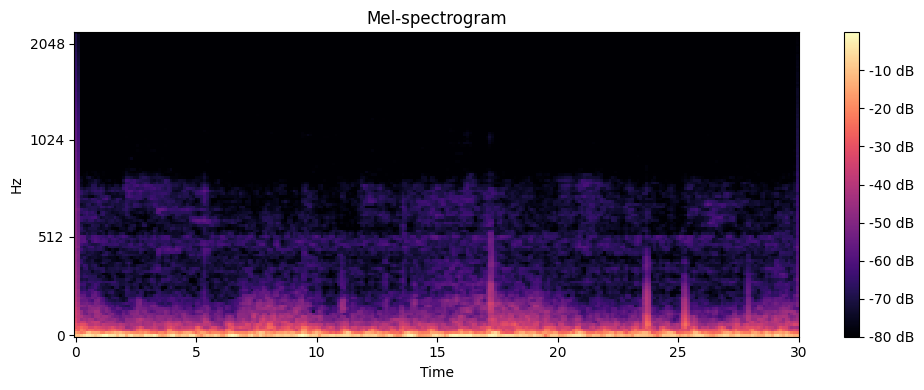

In [7]:
import matplotlib.pyplot as plt
import librosa.display

# Assuming 'features' is the output of extract_features and sr is the sample rate

# Calculate the number of Mel frequency bins (n_mels)
n_mels = 128
sr = 4410

# Extract Mel-spectrogram from features
mel_spectrogram_db = features[:n_mels, :]  # Adjust n_mels if different

plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-spectrogram')
plt.tight_layout()
plt.show()

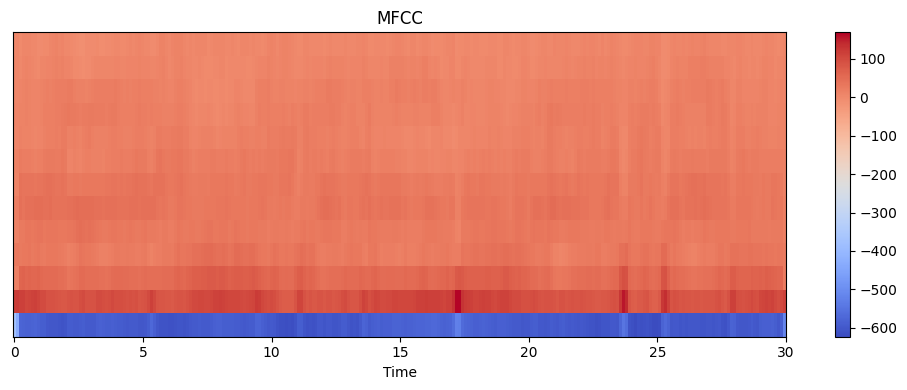

In [8]:
n_mfcc = 13  # Number of MFCC coefficients
mfcc = features[n_mels : n_mels + n_mfcc, :] #Extract MFCC from features

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

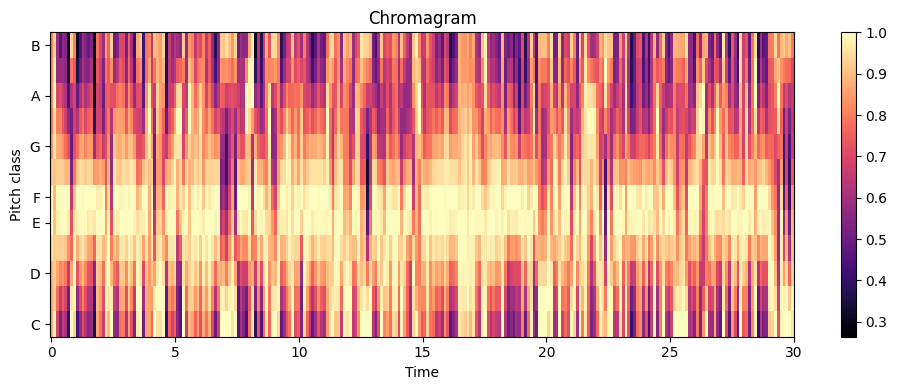

In [9]:

n_chroma = 12
chromagram = features[n_mels + 2*n_mfcc : n_mels + 2*n_mfcc + n_chroma, :]

plt.figure(figsize=(10, 4))
librosa.display.specshow(chromagram, sr=sr, x_axis='time', y_axis='chroma')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()


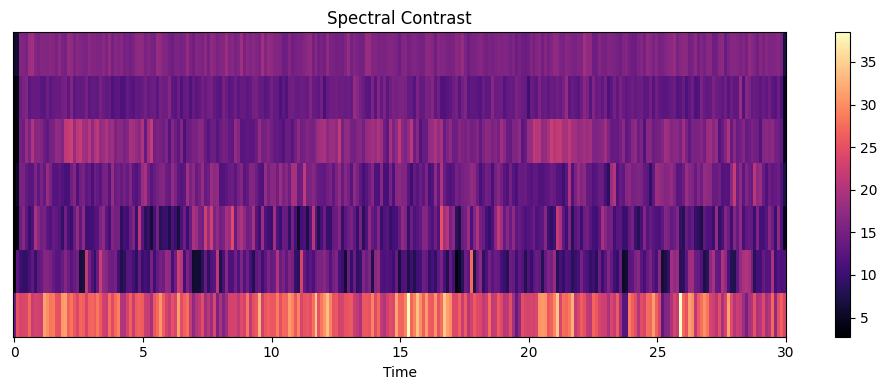

In [10]:
# --- Spectral Contrast ---
# Assuming you excluded Spectral Contrast to maintain 128x264 shape
# If included, adjust the slicing accordingly
n_bands = 7  # Number of spectral contrast bands
spectral_contrast = features[n_mels + 2*n_mfcc + n_chroma : n_mels + 2*n_mfcc + n_chroma + n_bands, :]

plt.figure(figsize=(10, 4))
librosa.display.specshow(spectral_contrast, sr=sr, x_axis='time')
plt.colorbar()
plt.title('Spectral Contrast')
plt.tight_layout()
plt.show()

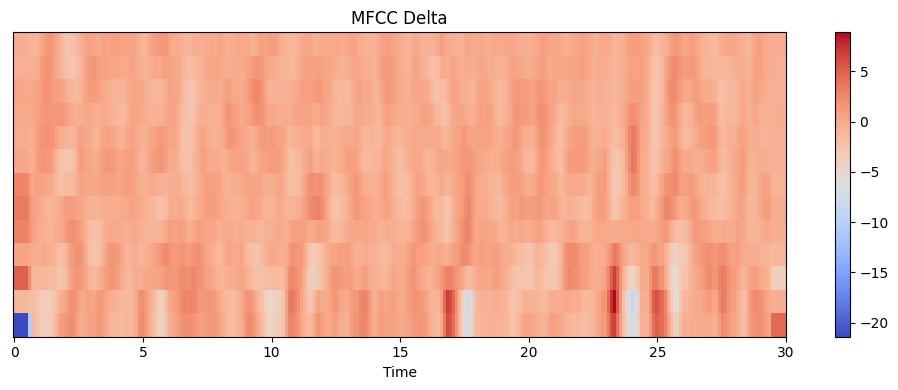

In [11]:
# --- MFCC Delta ---
mfcc_delta = features[n_mels + n_mfcc : n_mels + 2 * n_mfcc, :]  # Extract MFCC Delta

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_delta, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC Delta')
plt.tight_layout()
plt.show()

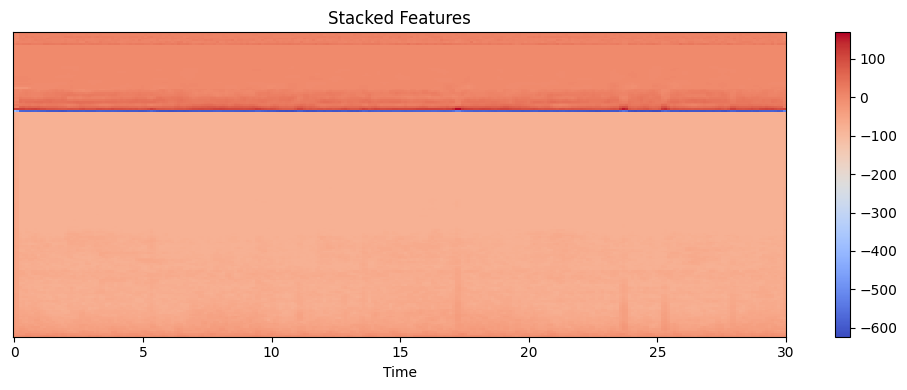

In [12]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(features, sr=sr, x_axis='time')
plt.colorbar()
plt.title('Stacked Features')
plt.tight_layout()
plt.show()

In [13]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F


# class CNNModel(nn.Module):
#     def __init__(self):
#         super(CNNModel, self).__init__()
#         self.conv1 = nn.Conv2d(1, 8, kernel_size=(3, 3))  # Change
#         self.pool1 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
#         self.conv2 = nn.Conv2d(8, 16, kernel_size=(3, 3))
#         self.pool2 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
#         # self.fc1 = nn.Linear(64 * 43 * 64, 64)  # Adjusted for (173, 259) input
#         # self.fc2 = nn.Linear(64, 10)  # Adjust output size based on number of classes
#         self.conv3 = nn.Conv2d(16, 32, kernel_size=(3, 3))
#         self.pool3 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
#         self.conv4 = nn.Conv2d(32, 64, kernel_size=(3, 3))
#         self.pool4 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
#         self.conv5 = nn.Conv2d(64,128, kernel_size=(3, 3))
#         self.pool5 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
#         self.fc = nn.Linear(2304, 10)  # Adjust output size based on number of classes


#     def forward(self, x):
#         x = self.pool1(F.relu(self.conv1(x)))
#         x = self.pool2(F.relu(self.conv2(x)))
#         x = self.pool3(F.relu(self.conv3(x)))
#         x = self.pool4(F.relu(self.conv4(x)))
#         x = self.pool5(F.relu(self.conv5(x)))
#         # x = x.view(-1, 64 * 43 * 64)  # Adjusted for (173, 259) input
#         # x = F.relu(self.fc1(x))
#         x= x.view(x.size(0), -1)
#         # print(x.shape)
#         x = self.fc(x)
#         # print(x.shape)
#         return x

# # Input shape for the model
# input_shape = (1, 173, 259)  # Channel, Height, Width

# # Create an instance of the model
# model = CNNModel()

# # Print model architecture
# print(model)

# out= model(torch.randn(1, *input_shape))
# print(out.shape)

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(128 * 10 * 16, 10)  # Adjusted for (173, 259) input size

    def forward(self, x):
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = self.pool3(F.relu(self.bn3(self.conv3(x))))
        x = self.pool4(F.relu(self.bn4(self.conv4(x))))

        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.dropout(x)
        x = self.fc(x)
        return x


In [15]:
disease_to_label = {
    'healthy': 0,
    'copd': 1,
    'pneumonia': 2,
    'asthma': 3,
    'urti': 4,
    'lung fibrosis': 5,
    'bronchitis': 6,
    'bronchiectasis': 7,
    'bronchiolitis': 8,
    'plueral effusion': 9,
    # ... add all your disease names and their corresponding labels
}

In [16]:
import librosa
import numpy as np
import os

features = []
labels = []
data_dir= "/content/drive/MyDrive/DL project/Merged and preprocessed audio/Final_audio"
metadata= pd.read_csv("/content/drive/MyDrive/DL project/labels/augmented.csv")
for index, row in metadata.iterrows():
    audio_file = row['Audio File Name']
    audio_path = os.path.join(data_dir, audio_file)  # Assuming data_dir is your audio files directory
    try:
        feature = extract_features(audio_path)  # Use your extract_features function
        features.append(feature)
        labels.append(disease_to_label[row['Condition']])  # Use your disease_to_label dictionary
    except Exception as e:
        print(f"Error processing {audio_file}: {e}")

features = np.array(features)
labels = np.array(labels)

/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)  # Adjust test_size and random_state
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)  # Adjust test_size and random_state

In [41]:
import torch

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

<ipython-input-41-f7a06f001b1e>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
<ipython-input-41-f7a06f001b1e>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long)
<ipython-input-41-f7a06f001b1e>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32)
<ipython-input-41-f7a06f001b1e>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTens

In [42]:
from torch.utils.data import DataLoader, TensorDataset
# ... (other imports) ...

# Create dataloaders for training and validation
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

In [43]:
# X_train = X_train.unsqueeze(1)  # Add channel dimension at index 1
# X_val = X_val.unsqueeze(1)      # Add channel dimension to validation data as well
# X_test = X_test.unsqueeze(1)    # Add channel dimension to test data as well

In [44]:
# import matplotlib.pyplot as plt
# import torch.optim as optim # import the optim module

# # ... (rest of your imports and code) ...

# # After defining your model:
# model = CNNModel()

# # Define the optimizer (e.g., Adam) and specify learning rate
# optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adjust lr as needed

# # Define the loss function (e.g., CrossEntropyLoss)
# criterion = nn.CrossEntropyLoss()

# # ... (rest of your training loop code) ...
# # Initialize lists to store training and validation metrics
# train_losses = []
# val_losses = []
# val_accuracies = []

# # Training loop
# num_epochs = 20  # Adjust number of epochs
# for epoch in range(num_epochs):
#     model.train()
#     epoch_train_loss = 0  # Accumulate training loss for the epoch
#     for batch_idx, (data, target) in enumerate(train_loader):
#         optimizer.zero_grad()
#         data = data.unsqueeze(1)  # Add channel dimension to data
#         data = data.squeeze(2)    # Remove the extra dimension
#         output = model(data)      # Forward pass
#         loss = criterion(output, target)  # Calculate loss
#         loss.backward()  # Backpropagate gradients
#         optimizer.step()  # Update model parameters
#         epoch_train_loss += loss.item()

#     # Average training loss for the epoch
#     train_loss = epoch_train_loss / len(train_loader)
#     train_losses.append(train_loss)

#     # Validation
#     model.eval()  # Set the model to evaluation mode
#     val_loss = 0
#     correct = 0
#     with torch.no_grad():  # Disable gradient calculation during validation
#         for data, target in val_loader:
#             data = data.unsqueeze(1)  # Add channel dimension to data
#             data = data.squeeze(2)    # Remove the extra dimension
#             output = model(data)
#             val_loss += criterion(output, target).item()  # Sum up batch loss
#             pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
#             correct += pred.eq(target.view_as(pred)).sum().item()

#     val_loss /= len(val_loader)  # Average validation loss
#     accuracy = 100. * correct / len(val_loader.dataset)

#     val_losses.append(val_loss)
#     val_accuracies.append(accuracy)

#     print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss:.4f}, "
#           f"Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.2f}%")

# # Plot Training and Validation Loss
# plt.figure(figsize=(10, 5))
# plt.plot(train_losses, label='Training Loss')
# plt.plot(val_losses, label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Training and Validation Loss')
# plt.legend()
# plt.show()

# # Plot Validation Accuracy
# plt.figure(figsize=(10, 5))
# plt.plot(val_accuracies, label='Validation Accuracy', color='green')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy (%)')
# plt.title('Validation Accuracy')
# plt.legend()
# plt.show()

# # Save the trained model (optional)
# torch.save(model.state_dict(), '/content/drive/MyDrive/DL project/audio_classification_model.pth')


In [45]:
# import matplotlib.pyplot as plt
# import torch.optim as optim # import the optim module

# # ... (rest of your imports and code) ...

# # After defining your model:
# model = CNNModel()

# # Define the optimizer (e.g., Adam) and specify learning rate
# optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adjust lr as needed

# # Define the loss function (e.g., CrossEntropyLoss)
# criterion = nn.CrossEntropyLoss()

# # ... (rest of your training loop code) ...
# # Initialize lists to store training and validation metrics
# train_losses = []
# val_losses = []
# val_accuracies = []

# # Training loop
# num_epochs = 50  # Adjust number of epochs
# for epoch in range(num_epochs):
#     model.train()
#     epoch_train_loss = 0  # Accumulate training loss for the epoch
#     for batch_idx, (data, target) in enumerate(train_loader):
#         optimizer.zero_grad()
#         data = data.unsqueeze(1)  # Add channel dimension to data
#         data = data.squeeze(2)    # Remove the extra dimension
#         output = model(data)      # Forward pass
#         loss = criterion(output, target)  # Calculate loss
#         loss.backward()  # Backpropagate gradients
#         optimizer.step()  # Update model parameters
#         epoch_train_loss += loss.item()

#     # Average training loss for the epoch
#     train_loss = epoch_train_loss / len(train_loader)
#     train_losses.append(train_loss)

#     # Validation
#     model.eval()  # Set the model to evaluation mode
#     val_loss = 0
#     correct = 0
#     with torch.no_grad():  # Disable gradient calculation during validation
#         for data, target in val_loader:
#             data = data.unsqueeze(1)  # Add channel dimension to data
#             data = data.squeeze(2)    # Remove the extra dimension
#             output = model(data)
#             val_loss += criterion(output, target).item()  # Sum up batch loss
#             pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
#             correct += pred.eq(target.view_as(pred)).sum().item()

#     val_loss /= len(val_loader)  # Average validation loss
#     accuracy = 100. * correct / len(val_loader.dataset)

#     val_losses.append(val_loss)
#     val_accuracies.append(accuracy)

#     print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss:.4f}, "
#           f"Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.2f}%")

# # Plot Training and Validation Loss
# plt.figure(figsize=(10, 5))
# plt.plot(train_losses, label='Training Loss')
# plt.plot(val_losses, label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Training and Validation Loss')
# plt.legend()
# plt.show()

# # Plot Validation Accuracy
# plt.figure(figsize=(10, 5))
# plt.plot(val_accuracies, label='Validation Accuracy', color='green')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy (%)')
# plt.title('Validation Accuracy')
# plt.legend()
# plt.show()

# # Save the trained model (optional)
# torch.save(model.state_dict(), '/content/drive/MyDrive/DL project/audio_classification_model.pth')


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/50], Train Loss: 3.5877, Val Loss: 2.3687, Accuracy: 25.49%
Epoch [2/50], Train Loss: 2.3352, Val Loss: 2.1392, Accuracy: 37.25%
Epoch [3/50], Train Loss: 1.8571, Val Loss: 1.5845, Accuracy: 49.51%
Epoch [4/50], Train Loss: 1.7813, Val Loss: 2.1059, Accuracy: 39.71%
Epoch [5/50], Train Loss: 1.4097, Val Loss: 2.4240, Accuracy: 38.24%
Epoch [6/50], Train Loss: 1.3800, Val Loss: 1.5109, Accuracy: 54.41%
Epoch [7/50], Train Loss: 1.0902, Val Loss: 1.0243, Accuracy: 66.18%
Epoch [8/50], Train Loss: 0.8192, Val Loss: 1.1733, Accuracy: 64.71%
Epoch [9/50], Train Loss: 0.7412, Val Loss: 3.6129, Accuracy: 35.29%
Epoch [10/50], Train Loss: 0.5506, Val Loss: 1.0195, Accuracy: 73.53%
Epoch [11/50], Train Loss: 0.5148, Val Loss: 1.0966, Accuracy: 72.06%
Epoch [12/50], Train Loss: 0.4690, Val Loss: 1.1448, Accuracy: 71.08%
Epoch [13/50], Train Loss: 0.3267, Val Loss: 0.9496, Accuracy: 80.39%
Epoch [14/50], Train Loss: 0.3972, Val Loss: 1.3711, Accuracy: 64.22%
Epoch [15/50], Train Loss: 0.

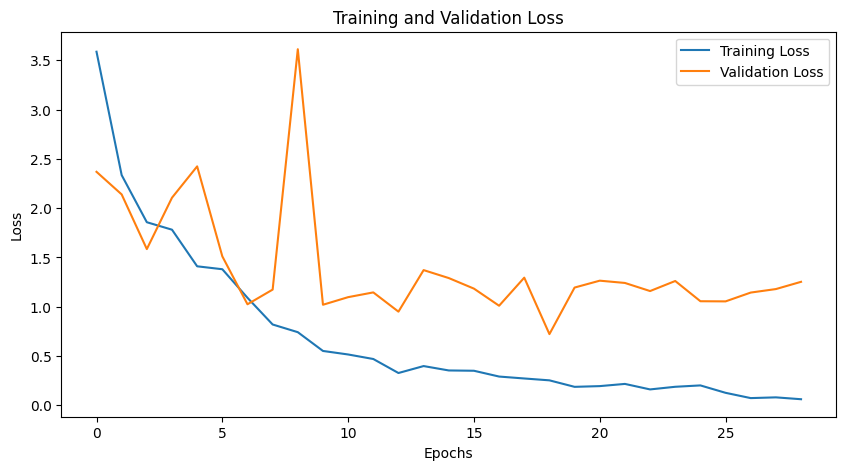

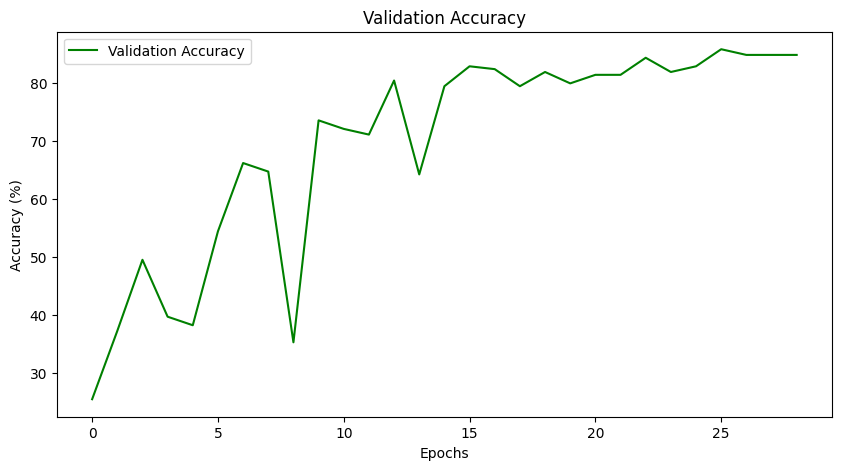

In [46]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import matplotlib.pyplot as plt

# Create model instance
model = CNNModel()

# Define optimizer, loss function, and learning rate scheduler
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)
criterion = nn.CrossEntropyLoss()

# Initialize training metrics
train_losses = []
val_losses = []
val_accuracies = []
best_val_loss = float('inf')
early_stop_count = 0
patience = 10  # Stop if validation loss doesn't improve after 10 epochs

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    epoch_train_loss = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        data = data.unsqueeze(1)  # Add channel dimension
        output = model(data)
        loss = criterion(output, target)
        loss.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        optimizer.step()
        epoch_train_loss += loss.item()

    train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    val_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in val_loader:
            data = data.unsqueeze(1)  # Add channel dimension
            output = model(data)
            val_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    accuracy = 100. * correct / len(val_loader.dataset)
    val_accuracies.append(accuracy)

    # Learning rate scheduler
    scheduler.step(val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, "
          f"Val Loss: {val_loss:.4f}, Accuracy: {accuracy:.2f}%")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_count = 0
        torch.save(model.state_dict(), 'best_model.pth')  # Save best model
    else:
        early_stop_count += 1

    if early_stop_count >= patience:
        print("Early stopping triggered.")
        break

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy')
plt.legend()
plt.show()


In [24]:
import cv2  # For image processing
import numpy as np
import torch
from torch.autograd import Function

In [48]:
class GradCAM(object):
    def __init__(self, model, target_layer_names):
        self.model = model
        self.target_layer_names = target_layer_names  # Layer for feature extraction
        self.gradients = None  # Store gradients
        self.activations = None  # Store activations

        # Register hooks to capture gradients and activations
        def backward_hook(module, grad_input, grad_output):
            self.gradients = grad_output[0]
        def forward_hook(module, input, output):
            self.activations = output

        # Find the target layer and register hooks
        for name, module in self.model.named_modules():
            if name in self.target_layer_names:
                module.register_backward_hook(backward_hook)
                module.register_forward_hook(forward_hook)

    def forward(self, input):
        return self.model(input)

    def __call__(self, input, index=None):
        self.model.eval()  # Set model to evaluation mode
        logits = self.forward(input)  # Forward pass

        if index is None:
            index = logits.argmax(dim=1).item()  # Get predicted class

        one_hot = torch.zeros_like(logits)  # Create one-hot encoding
        one_hot[:, index] = 1
        logits.backward(gradient=one_hot, retain_graph=True)  # Backpropagate

        gradients = self.gradients.cpu().data.numpy()  # Get gradients
        activations = self.activations.cpu().data.numpy()[0, :]  # Get activations

        weights = np.mean(gradients, axis=(2, 3))[0, :]  # Global average pooling
        cam = np.zeros(activations.shape[1:], dtype=np.float32)  # Initialize CAM

        for i, w in enumerate(weights):
            cam += w * activations[i, :, :]  # Weighted sum of activations

        cam = np.maximum(cam, 0)  # ReLU
        cam = cv2.resize(cam, input.shape[2:])  # Resize to input size
        cam = cam - np.min(cam)
        cam = cam / np.max(cam)  # Normalize to [0, 1]

        return cam

In [26]:
print(cam.shape)

NameError: name 'cam' is not defined

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1827: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


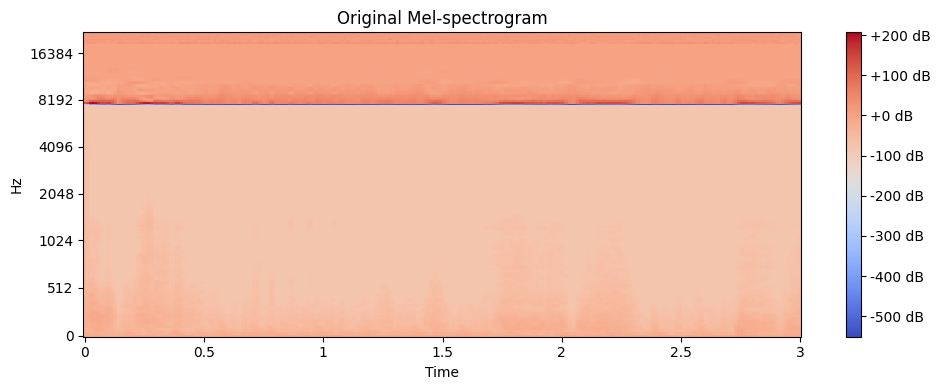

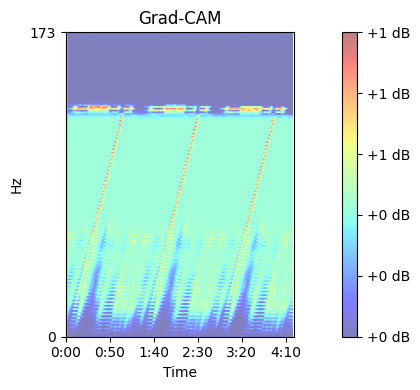

In [51]:
# Instantiate Grad-CAM
grad_cam = GradCAM(model=model, target_layer_names=['conv2'])

# Input data for visualization
input_data = X_test[0].unsqueeze(0).unsqueeze(0)

# Generate Grad-CAM
cam = grad_cam(input_data)

# Visualize the CAM using Matplotlib

# Reshape the CAM to match the original spectrogram dimensions
cam = cam.reshape(173,259)  # Adjust the shape if needed


# Assuming 'features' contains the original spectrogram data
# For example, you might have:
# features = extract_features(audio_file)
# mel_spectrogram_db = features[:n_mels, :]
# Replace mel_spectrogram_db with your spectrogram data

# Get the original spectrogram (e.g., mel_spectrogram_db)
# Replace with your actual variable for the spectrogram

original_spectrogram = input_data[0][0].detach().numpy()
# Display the original spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(original_spectrogram, sr=44100, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Mel-spectrogram')
plt.tight_layout()
plt.show()

# Overlay the CAM on the original spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(original_spectrogram, sr=44100, x_axis='time', y_axis='mel', alpha=0.5)  # Set alpha for transparency
plt.imshow(cam, cmap='jet', alpha=0.5, extent=[0, original_spectrogram.shape[1], 0, original_spectrogram.shape[0]], origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.title('Grad-CAM')
plt.tight_layout()
plt.show()

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [53]:
# Assuming you have your trained model and test data (X_test, y_test)
model.eval()
with torch.no_grad():
    y_pred_probs = model(X_test)  # Get predicted probabilities
    y_pred = torch.argmax(y_pred_probs, dim=1)  # Get predicted class labels

RuntimeError: Given groups=1, weight of size [16, 1, 3, 3], expected input[1, 254, 173, 259] to have 1 channels, but got 254 channels instead

In [54]:
# Accuracy
accuracy = accuracy_score(y_test.cpu(), y_pred.cpu())

# Precision
precision = precision_score(y_test.cpu(), y_pred.cpu(), average='weighted')  # Use 'weighted' for multi-class

# Recall
recall = recall_score(y_test.cpu(), y_pred.cpu(), average='weighted')

# F1-score
f1 = f1_score(y_test.cpu(), y_pred.cpu(), average='weighted')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test.cpu(), y_pred.cpu())

# ROC AUC (for binary classification)
# If you have a binary classification problem, you can calculate ROC AUC:
# roc_auc = roc_auc_score(y_test.cpu(), y_pred_probs[:, 1].cpu())  # Assuming class 1 is the positive class

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
# ... (print other metrics if calculated) ...

Accuracy: 0.8346
Precision: 0.8322
Recall: 0.8346
F1-score: 0.8276
Confusion Matrix:
[[12  0  2  4  1  1  1  2  0  2]
 [ 1 24  2  1  0  0  0  0  1  2]
 [ 0  0 18  0  1  0  0  0  3  0]
 [ 3  0  2 14  0  3  2  0  0  2]
 [ 2  0  0  0 31  0  0  0  1  0]
 [ 0  0  0  0  0 23  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0 28  0  0]
 [ 0  0  0  0  0  0  0  0 28  0]
 [ 0  0  0  3  0  0  0  0  0 16]]


In [31]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

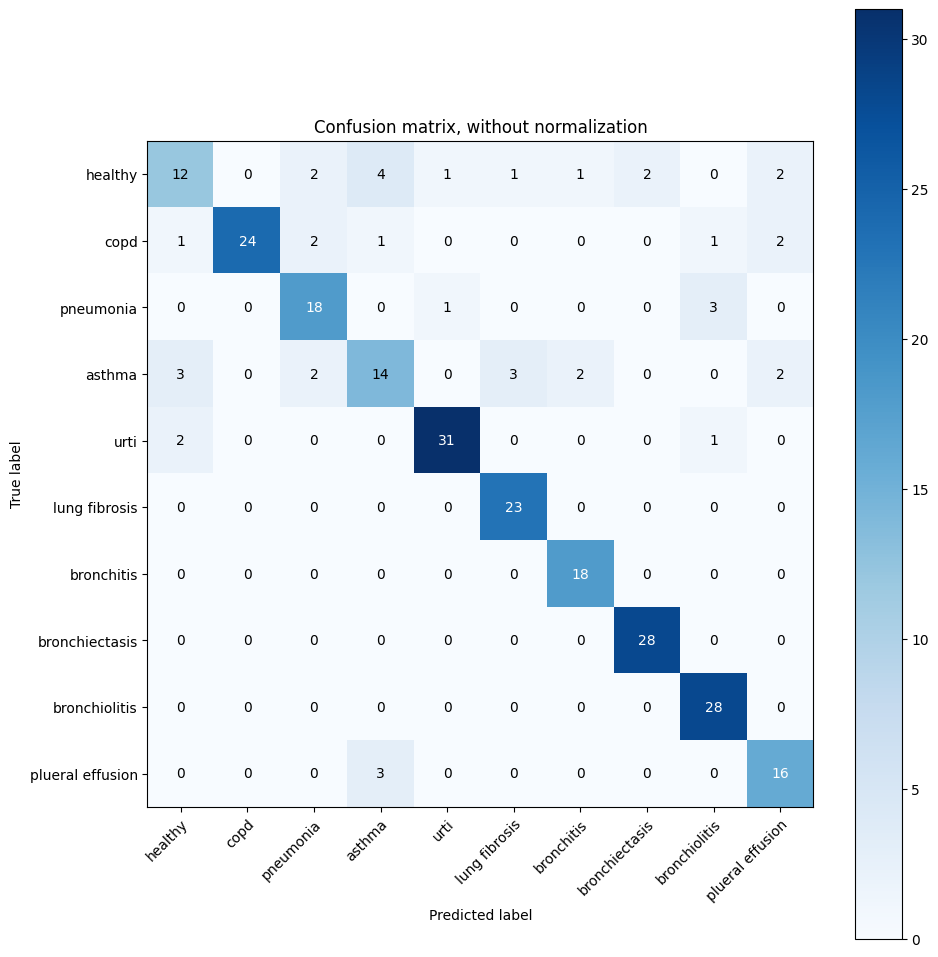

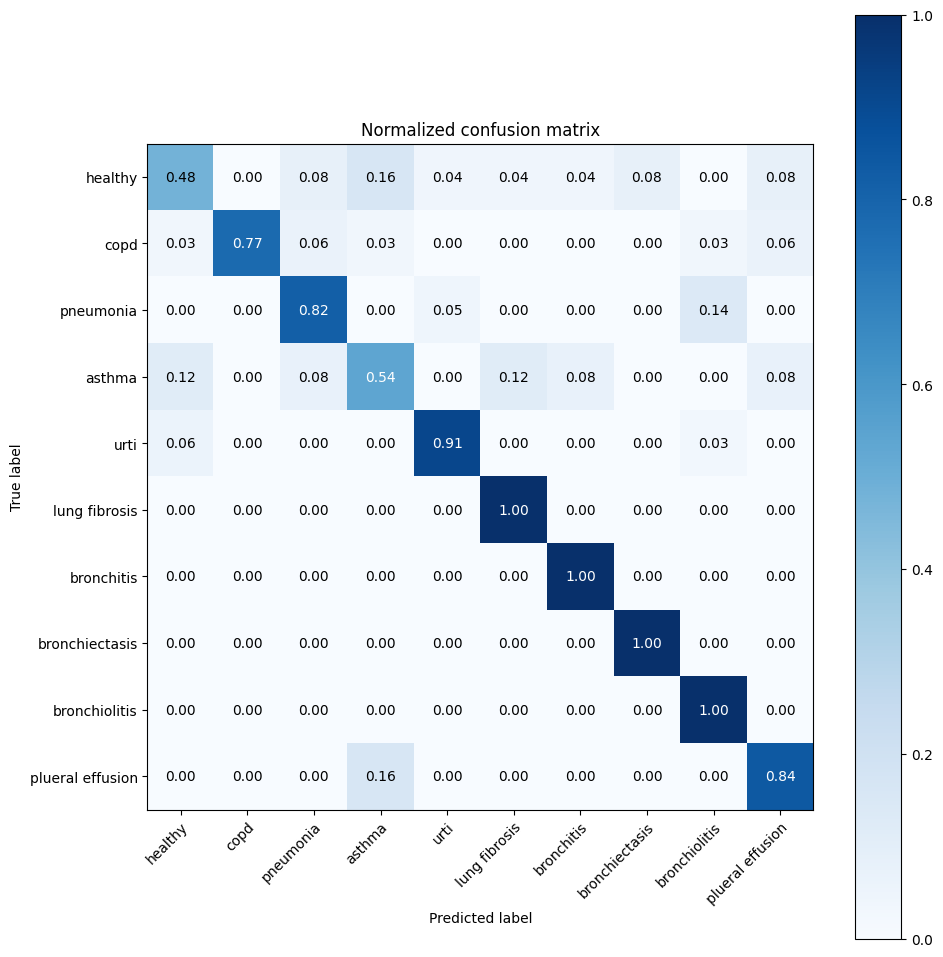

Accuracy: 0.8346
Precision: 0.8322
Recall: 0.8346
F1-score: 0.8276


In [32]:
# Assuming you have your predictions in y_pred and true labels in y_test

# Calculate metrics
accuracy = accuracy_score(y_test.cpu(), y_pred.cpu())
precision = precision_score(y_test.cpu(), y_pred.cpu(), average='weighted')
recall = recall_score(y_test.cpu(), y_pred.cpu(), average='weighted')
f1 = f1_score(y_test.cpu(), y_pred.cpu(), average='weighted')

# Get class names (replace with your actual class names)
class_names = list(disease_to_label.keys())

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test.cpu(), y_pred.cpu(), classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test.cpu(), y_pred.cpu(), classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")